In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, Flatten, Concatenate
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from datasets import load_dataset, concatenate_datasets

In [ ]:
from datasets import load_dataset, concatenate_datasets, DatasetDict, Dataset, Features, Value, Sequence, Image

# Load both datasets
ds_one = load_dataset("lmms-lab/ai2d")  # e.g., just 'train'
ds_three = load_dataset("yyyyifan/TQA")  # has 'train', 'test', 'validation'

# Define the correct unified feature types
new_features = Features({
    'question': Value(dtype='string'),
    'options': Sequence(Value(dtype='string')),
    'answer': Value(dtype='string'),  # <-- converted to string
    'image': Image()
})

# Cast all splits to have same feature types
ds_one = ds_one.cast(new_features)
ds_three = {k: v.cast(new_features) for k, v in ds_three.items()}

# Merge all splits from ds_three
merged_three = concatenate_datasets([ds_three[split] for split in ds_three])

# Merge both datasets
dataset = concatenate_datasets([ds_one['test'], merged_three])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/700 [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/62.3M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/77.2M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/3088 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/82.3M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/41.7M [00:00<?, ?B/s]

val-00000-of-00002.parquet:   0%|          | 0.00/94.6M [00:00<?, ?B/s]

val-00001-of-00002.parquet:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/116M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/104M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/3285 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/2781 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/6501 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3088 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3285 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2781 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/6501 [00:00<?, ? examples/s]

Question: Which would be most directly affected if all the baleen whales were removed?
Options: ['phytoplankton', 'smaller toothed whales', 'penguins', 'birds']
Answer: 1


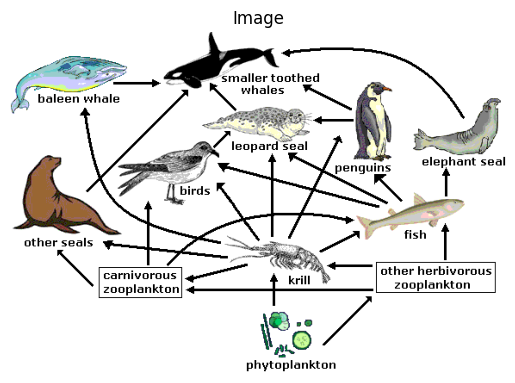

In [ ]:
data_point = dataset[10]

for key, value in data_point.items():
    if key != 'image':
        print(f"{key.title()}: {value}")

plt.imshow(data_point['image'])
plt.title("Image")
plt.axis('off')
plt.show()

In [ ]:
texts = []
labels = []
questions = []
options_all = []

for item in dataset:
    q = item['question']
    opts = item['options']
    ans = int(item['answer'])

    # Store each option as "question + option"
    q_opts = [f"{q} {opt}" for opt in opts]
    texts.extend(q_opts)

    labels.append(ans)
    questions.append(q)
    options_all.append(opts)

Image Preprocessing

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

Text Preprocessing

In [ ]:
MAX_LEN = 30  # set based on your text length

# Tokenize and pad each group of 4 options per question
encoded_qopts = []
for i in range(0, len(texts), 4):  # 4 options per question
    group = texts[i:i+4]
    seq = tokenizer.texts_to_sequences(group)
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    encoded_qopts.append(padded)  # shape: (4, MAX_LEN)

In [ ]:
# Already created as `labels`, make sure they are integers
labels = [int(label) for label in labels]
labels = np.array(labels)

In [ ]:
 # Import GlobalAveragePooling2D

# DenseNet201 setup
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add GlobalAveragePooling2D layer to flatten the features
fe = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.layers[-2].output))

# Image feature extraction (outside the TensorFlow graph)
img_size = 224
features = []

# Iterate through the dataset using tqdm for progress visualization
for item in tqdm(dataset, desc="Extracting features"):
    pil_img = item['image'].resize((img_size, img_size))
    img = img_to_array(pil_img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

    # Predict features without verbose output
    feature = fe.predict(img, verbose=0)
    features.append(feature.squeeze())

# Now, proceed with your training process as before using the extracted features

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Extracting features: 100%|██████████| 15655/15655 [34:31<00:00,  7.56it/s]


In [ ]:
VOCAB_SIZE = 10000
MAX_LEN = 30

# Text input
text_input = Input(shape=(4, MAX_LEN), name="text_input")  # (batch, 4, 30)
embedding_layer = Embedding(input_dim=VOCAB_SIZE, output_dim=128)

# Embed each option
embedded = TimeDistributed(embedding_layer)(text_input)  # (batch, 4, 30, 128)

# LSTM on each option
lstm_out = TimeDistributed(LSTM(64))(embedded)  # (batch, 4, 64)

# Flatten text features
flat_text = Flatten()(lstm_out)  # (batch, 256)

# Image input
image_input = Input(shape=(1920,), name="image_input")  # (batch, 1920)

# Combine
combined = Concatenate()([flat_text, image_input])

# Dense layers
x = Dense(256, activation='relu')(combined)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

# Build and compile
model = Model(inputs=[text_input, image_input], outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 4, 30)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 4, 30,     │  1,280,000 │ text_input[0][0]  │
│ (TimeDistributed)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 4, 64)     │     49,408 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 256)       │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input         │ (None, 1920)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2176)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ image_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    557,312 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │        516 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,920,132 (7.32 MB)

 Trainable params: 1,920,132 (7.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Prepare the data for text and image features
text_input_data = np.array(encoded_qopts)  # shape: (num_samples, 4, MAX_LEN)
image_input_data = np.array(features)  # shape: (num_samples, 1920)
labels = np.array(labels)  # shape: (num_samples,)

text_input_data = np.array(text_input_data, dtype=np.int32)
image_input_data = np.array(image_input_data, dtype=np.float32)
labels = np.array(labels, dtype=np.int32)
# Ensure image_input_data has the correct shape
image_input_data = image_input_data.reshape(image_input_data.shape[0], 1920)

# Train the model


In [ ]:
history = model.fit([text_input_data, image_input_data], labels, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2792 - loss: 1.3849 - val_accuracy: 0.2581 - val_loss: 1.3882
Epoch 2/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2910 - loss: 1.3739 - val_accuracy: 0.2434 - val_loss: 1.3923
Epoch 3/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3095 - loss: 1.3624 - val_accuracy: 0.2450 - val_loss: 1.3984
Epoch 4/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3294 - loss: 1.3420 - val_accuracy: 0.2549 - val_loss: 1.4062
Epoch 5/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3496 - loss: 1.3289 - val_accuracy: 0.2478 - val_loss: 1.4146
Epoch 6/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3561 - loss: 1.3160 - val_accuracy: 0.2347 - val_loss: 1.4353
Epoch 7/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3741 - loss: 1.2927 - val_accuracy: 0.2536 - val_loss: 1.4385
Epoch 8/25
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3859 - loss: 1.2766 - val_acc

In [ ]:
np.unique(labels, return_counts=True)


(array([0, 1, 2, 3], dtype=int32), array([3931, 3943, 4015, 3766]))

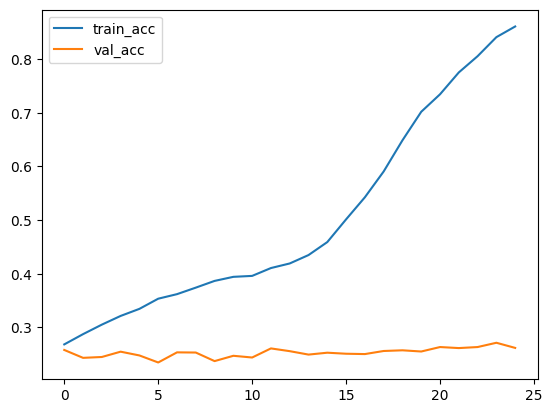

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [ ]:
 # Import load_img
def predict_answer(image_path, question, options, model, tokenizer, fe_model, max_len=30, img_size=224):
    # --- Image feature extraction ---
    img = load_img(image_path, target_size=(img_size, img_size))
    img = img_to_array(img) / 255.
    img = np.expand_dims(img, axis=0)
    img_feat = fe_model.predict(img, verbose=0).reshape(1, -1)  # shape (1, 1920)

    # --- Text preprocessing ---
    qopts = [question + " " + opt for opt in options]
    tokens = tokenizer.texts_to_sequences(qopts)
    padded = pad_sequences(tokens, maxlen=max_len, padding='post')
    text_feat = np.array(padded).reshape(1, 4, max_len)  # shape (1, 4, max_len)

    # --- Prediction ---
    pred = model.predict([text_feat, img_feat])
    predicted_idx = np.argmax(pred)

    return options[predicted_idx]

In [ ]:
question = "Based on the given diagram, the penguin is a"
options = ['Decomposer', 'Predator', 'Herbivore', 'Plant']
image_path = "/content/peguin.jpg"

predicted = predict_answer(image_path, question, options, model, tokenizer, fe)
print("Predicted Answer:", predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Predicted Answer: Decomposer


In [ ]:
question = "Based on the given diagram, which animal is this"
options = ['Tiger', 'Lion', 'Horse', 'Dog']
image_path = "/content/one.jpg"

predicted = predict_answer(image_path, question, options, model, tokenizer, fe)
print("Predicted Answer:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
Predicted Answer: Horse


In [ ]:
model.save('vqa_model.h5')

In [ ]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)